In [1]:
import os
import pathlib as pl
import sys
import time

repo_dir = pl.Path(os.path.dirname(os.getcwd()))
sys.path.append(str(repo_dir / 'AMDC-Firmware' / 'scripts'))

from AMDC import AMDC
from AMDC_Logger import AMDC_Logger, find_mapfile
from AMDC_LivePlot import AMDC_LivePlot

amdc = AMDC()

# After creating the amdc object...

# Set comm defaults for Ethernet
amdc.setup_comm_defaults('eth')

# Init ethernet 
amdc.eth_init()

# Set up the default ASCII command socket
s0, s0_id = amdc.eth_new_socket('ascii_cmd')
amdc.eth_set_default_ascii_cmd_socket(s0)

# Cretae AMDC Logger Object
mapfile_path = find_mapfile(repo_dir)
logger = AMDC_Logger(AMDC = amdc, mapfile = mapfile_path)

In [ ]:
amdc.cmd('gen_ctrl chn 5')

	> gen_ctrl init
['gen_ctrl init', 'SUCCESS']
	> log info
	> log reg 0 LOG_Iu 537542744 5000 double
['log reg 0 LOG_Iu 537542744 5000 double', 'SUCCESS']
	> log reg 1 LOG_Vdc 537542776 5000 double
['log reg 1 LOG_Vdc 537542776 5000 double', 'SUCCESS']


<IPython.core.display.Javascript object>


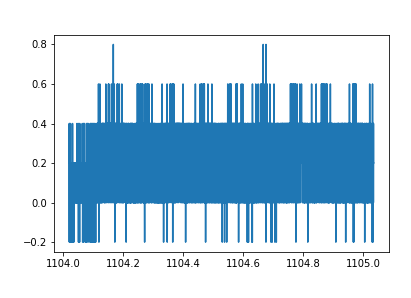

	> log stream start 0 1
['log stream start 0 1', 'SUCCESS']


<IPython.core.display.Javascript object>


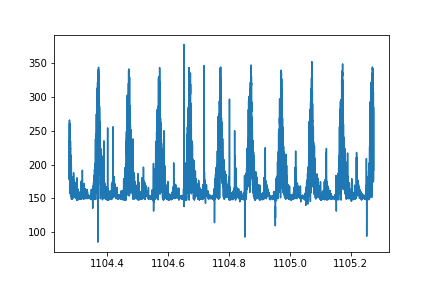

	> log stream start 1 2
['log stream start 1 2', 'SUCCESS']


In [5]:
# Define Command
#cmd_str = 'gen_ctrl init'
# Send command
#amdc.cmd(cmd_str)

amdc.cmd('gen_ctrl init')

# Setup Logger
logger.sync()

# Register Vars
logger.register('Iu Vdc', samples_per_sec = 5000, var_type = 'double')

# filepath = Path('C:\Users\MasterGnome\Documents\01-WISC\Research\Code\AMDC_base\AMDC-Private\usr\gen_control'); 
# auto_register(filepath, samples_per_sec = 1000)

# Streaming Log 

# Jupyter notebook command for live plot
%matplotlib notebook

# plot w/ 1,000ms frame update w/ a 0.1s window length
# plot = AMDC_LivePlot(logger, 'Va', window_sec = 1000, 0.1)
p1 = AMDC_LivePlot(logger, 'Iu', window_sec = 1)
p1.start_stream()
p1.show()

p2 = AMDC_LivePlot(logger, 'Vdc', window_sec = 1)
p2.start_stream()
p2.show()

#p2 = AMDC_LivePlot(logger, 'Iv', window_sec = 1)
#p2.start_stream()
#p2.show()

#p3 = AMDC_LivePlot(logger, 'Iw', window_sec = 1)
#p3.start_stream()
#p3.show()

#p3 = AMDC_LivePlot(logger, 'Idc', window_sec = 1)
#p3.start_stream()
#p3.show()

#p4 = AMDC_LivePlot(logger, 'Vdc', window_sec = 1)
#p4.start_stream()
#p4.show()


In [6]:
amdc.cmd('gen_ctrl freq 62.8')

	> gen_ctrl freq 62.8
['gen_ctrl freq 62.8', 'SUCCESS']


['gen_ctrl freq 62.8', 'SUCCESS']

In [9]:
amdc.cmd('gen_ctrl amplitude 0.5')

	> gen_ctrl amplitude 0.5
['gen_ctrl amplitude 0.5', 'SUCCESS']


['gen_ctrl amplitude 0.5', 'SUCCESS']

In [3]:
# Define Command
cmd_str = 'gen_ctrl chn 5'
# Send command
amdc.cmd(cmd_str)

	> gen_ctrl chn 5
['gen_ctrl chn 5', 'SUCCESS']


['gen_ctrl chn 5', 'SUCCESS']

In [10]:
# Define Command
cmd_str = 'gen_ctrl deinit'
# Send command
amdc.cmd(cmd_str)

##### CELL START #####
p1.stop_stream()
p2.stop_stream()
# p3.stop_stream()
# p4.stop_stream()

# Return to static inline plots
%matplotlib inline

# Unregister Vars
logger.unregister_all()

	> gen_ctrl deinit
['gen_ctrl deinit', 'SUCCESS']
	> log stream stop 0 1
['log stream stop 0 1', 'SUCCESS']
	> log stream stop 1 2
['log stream stop 1 2', 'SUCCESS']
	> log unreg 0
['log unreg 0', 'SUCCESS']
	> log unreg 1
['log unreg 1', 'SUCCESS']
